# Spectral Analysis

* Spectral analysis in astronomy involves examining the spectrum of light emitted, absorbed, or scattered by celestial objects. This analysis is fundamental because it provides a wealth of information about the object, such as its chemical composition, temperature, density, mass, distance, luminosity, and relative motion.
* The light from an astronomical object, when passed through a prism or a diffraction grating, spreads out to form a spectrum. Analyzing these patterns helps astronomers determine a lot about the object in question. For example, the specific wavelengths of light that are absorbed or emitted can identify the elements present in a star:
  - **Continuous Spectrum**: A seamless gradation of colors or wavelengths, typically seen in solid, liquid, or densely packed materials.
  - **Emission Spectrum**: Consists of bright lines or bands on a dark background. It's characteristic of thin gases in which atoms emit light at specific wavelengths.
  - **Absorption Spectrum**: Shows dark lines or bands in the spectrum, formed when light passes through a cooler, diffuse gas.
* Modern spectrographs can produce spectra with high wavelength resolution which allows for the detailed analysis of absorption lines.
* Spectral analysis in astronomy involves several key formulas, each revealing different aspects of the celestial objects being studied:
  - **Wien's Displacement Law**: This law helps in determining the temperature of a star. It states that the wavelength at which a blackbody radiates most intensely is inversely proportional to its temperature.
  > $\lambda_{\text{max}} = \frac{b}{T}$

  where:

  $\lambda_{\text{max}}$: the wavelength at which the emission is strongest

  $T$: the temperature of the blackbody in Kelvin

  $b$: Wien's displacement constant, approximately ($2.897 \times 10^{-3}mK$)

  - **Doppler Shift**: Used to determine the radial velocity of a star or galaxy. If an object is moving towards us, its spectral lines are shifted towards shorter wavelengths (blue shift). If it's moving away, the shift is towards longer wavelengths (red shift).
  > $\frac{\Delta \lambda}{\lambda} = \frac{v}{c}$

  where:

  $\frac{\Delta \lambda}{\lambda}$: the change in wavelength ($\Delta \lambda = \lambda_{\text{observed wavelength}} - \lambda_{\text{emitted wavelength}}$)

  $\lambda$: the original wavelength

  $v$: the velocity of the object relative to the observer

  $c$: the speed of light

  - **Stefan-Boltzmann Law**: This law relates the total energy radiated per unit surface area of a blackbody to its temperature.
  > $F = \sigma T^4$

  where:

  $F$: the total energy radiated per unit surface area

  $\sigma$: the Stefan-Boltzmann constant, approximately ($5.67 \times 10^{-8} W m^{-2}K^{-4}$)

  $T$: the temperature in Kelvin

  - **Rydberg Formula for Hydrogen**: It's used to predict the wavelengths of the spectral lines of hydrogen.
  > $\frac{1}{\lambda} = R \left( \frac{1}{n_1^2} - \frac{1}{n_2^2} \right)$

  where:

  $\lambda$: the wavelength of the light

  $R$: the Rydberg constant, approximately ($1.097 \times 10^7 m^{-1}$)

  $n_1$ and $n_2$: integers (energy levels), with $n_2 > n_1$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c,sigma_sb
plt.style.use("dark_background")
%matplotlib inline

In [3]:
def WienLaw(temperature:int or float)->int or float:
  """
    Calculate the peak wavelength (lambda_max) for a given temperature using Wien's Displacement Law.
    :param temperature: Temperature in Kelvin
    :return: Peak wavelength in meters
  """
  wienConstant = 2.897e-3  # Wien's displacement constant in meters Kelvin
  return wienConstant/temperature

In [4]:
def DopplerShift(wavelength:int or float,velocity:int or float)->int or float:
  """
    Calculate the Doppler Shift of a wavelength for a given velocity.
    :param wavelength: Original wavelength in meters
    :param velocity: Velocity in meters/second
    :return: Shifted wavelength in meters
  """
  return wavelength*(1+velocity/c.value)

In [5]:
def StefanBoltzmannLaw(temperature:int or float)->int or float:
  """
    Calculate the total energy radiated per unit surface area using Stefan-Boltzmann Law.
    :param temperature: Temperature in Kelvin
    :return: Total energy radiated in W/m^2
  """
  return sigma_sb.value*temperature**4

In [6]:
def RydbergFormula(n1:int or float,n2:int or float)->int or float:
  """
    Calculate the wavelength of light emitted during a transition of an electron
    between two levels in a hydrogen atom using the Rydberg Formula.
    :param n1: Lower energy level
    :param n2: Higher energy level
    :return: Wavelength in meters
  """
  rydbergConstant = 1.097e7 # Rydberg constant in m^-1
  return 1/(rydbergConstant*(1/n1**2-1/n2**2))

In [7]:
temperature = 5778  # Temperature of the Sun in Kelvin
peakWavelength = WienLaw(temperature)
print(f"Wien's Law - Peak Wavelength for Sun: {peakWavelength} m")

Wien's Law - Peak Wavelength for Sun: 5.013845621322256e-07 m


In [8]:
wavelength = 656.3e-9  # H-alpha line in meters
velocity = 300000  # Velocity in m/s
dopplerShift = DopplerShift(wavelength,velocity)
print(f"Doppler Shift: {dopplerShift} m")

Doppler Shift: 6.569567543470356e-07 m


In [9]:
radiationEnergy = StefanBoltzmannLaw(temperature)
print(f"Stefan-Boltzmann Law - Radiated Energy: {radiationEnergy} W/m^2")

Stefan-Boltzmann Law - Radiated Energy: 63200699.73684546 W/m^2


In [10]:
n1,n2 = 2,3  # Transition from level 2 to 3 in hydrogen
wavelengthH = RydbergFormula(n1,n2)
print(f"Rydberg Formula - Wavelength for H transition: {wavelengthH} m")

Rydberg Formula - Wavelength for H transition: 6.563354603463993e-07 m


## Example

In [11]:
temperatureBetelgeuse = 3600 # Kelvin
velocityBetelgeuse = 20e3  # m/s (20 km/s towards Earth)

In [12]:
peakWavelength = WienLaw(temperature)
print(f"Peak Wavelength for Betelgeuse: {peakWavelength} m")

Peak Wavelength for Betelgeuse: 5.013845621322256e-07 m


In [13]:
wavelengthInterval = np.linspace(0.1e6,3e6,1000) # Wavelengths range from 0.1 to 3 micrometers

In [14]:
intensity = 1 / (wavelengthInterval**5*(np.exp(1/(wavelengthInterval*temperatureBetelgeuse))-1))

In [15]:
shiftedPeakWavelength = DopplerShift(peakWavelength,-velocityBetelgeuse) # Negative velocity for approaching

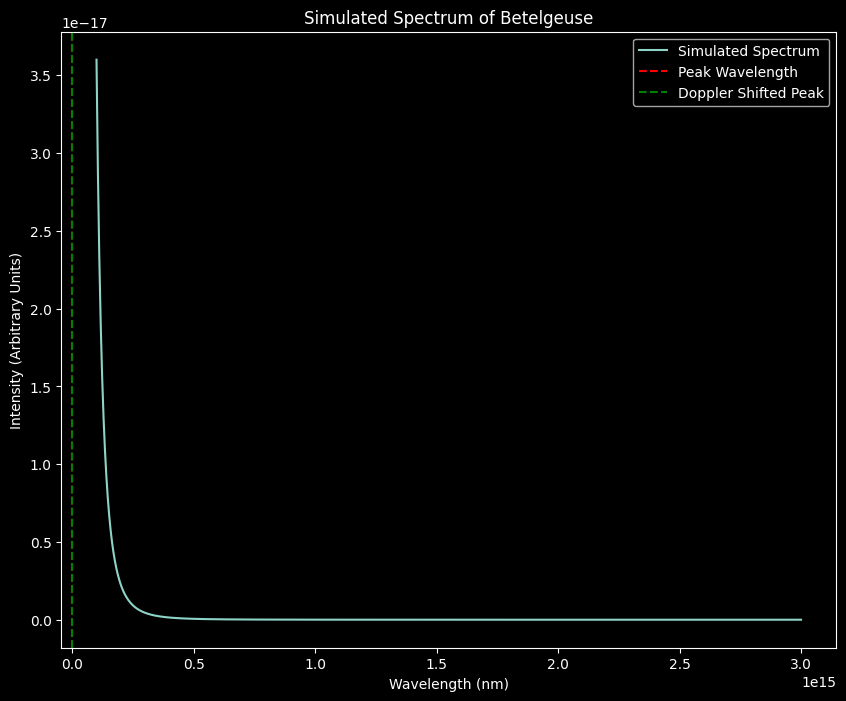

In [16]:
plt.figure(figsize=(10,8))
plt.plot(wavelengthInterval*1e9,intensity,label="Simulated Spectrum")
plt.axvline(peakWavelength*1e9,color="r",linestyle="--",label="Peak Wavelength")
plt.axvline(shiftedPeakWavelength*1e9,color="g",linestyle="--",label="Doppler Shifted Peak")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Intensity (Arbitrary Units)")
plt.title("Simulated Spectrum of Betelgeuse")
plt.legend()
plt.show()

# FITS File

* FITS (Flexible Image Transport System) is a file format widely used in astronomy. It's designed to store, transmit, and manipulate scientific images and data, particularly in astronomy. FITS files are advantageous because:
  - They can handle a wide range of data types, including images, multi-dimensional arrays (like spectra), and tables.
  - They include both data and metadata (information about the data) in a single file.
  - They are standardized, ensuring compatibility across different software and observatories.
* In practical terms, astronomers often collect data from telescopes in FITS format. This data might include images of celestial bodies, light spectra, or other observational data.

In [17]:
from google.colab import drive
drive.mount("/content/driveFiles")

Mounted at /content/driveFiles


In [19]:
from astropy.io import fits

**For real data**: https://drive.google.com/file/d/1HL8WxFv1vD-BrAKIDh6ynZQXbhG7r83J/view?usp=sharing

In [18]:
dataSpectrumPath = "/content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/spectral_data/ADP.2014-10-29T09_42_08.747.fits"

In [20]:
fitsFileRead = fits.open(dataSpectrumPath)

In [21]:
print("INFORMATION:\n\n")
fitsFileRead.info()

INFORMATION:


Filename: /content/driveFiles/MyDrive/Astronomy/Project Data/fits_file/spectral_data/ADP.2014-10-29T09_42_08.747.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     788   ()      
  1  SPECTRUM      1 BinTableHDU     71   1R x 6C   [134944D, 134944E, 134944E, 134944E, 134944E, 134944E]   


For a more detaileddescription of the columns:

In [22]:
fitsFileRead[1].columns

ColDefs(
    name = 'WAVE'; format = '134944D'; unit = 'Angstrom'
    name = 'FLUX_REDUCED'; format = '134944E'; unit = 'adu'
    name = 'ERR_REDUCED'; format = '134944E'; unit = 'adu'
    name = 'BGFLUX_REDUCED'; format = '134944E'; unit = 'adu'
    name = 'FLUX'; format = '134944E'; unit = '10^-16 erg/cm^2/s/Angstrom'
    name = 'ERR'; format = '134944E'; unit = '10^-16 erg/cm^2/s/Angstrom'
)

**Analog-to-Digital Units (ADU), are a unit of measurement used in astronomy to quantify the flux (the amount of light) captured by a CCD (Charge-Coupled Device) camera in a telescope. The ADU is specific to digital imaging and is a result of the analog-to-digital conversion process.**

For raw data:

In [23]:
specData = fitsFileRead[1].data
fitsFileRead.close()

In [28]:
wavelength = specData[0][0]
flux = specData[0][4]

In [27]:
type(wavelength)

numpy.ndarray

In [33]:
wavelength.shape

(134944,)

In [29]:
type(flux)

numpy.ndarray

In [34]:
flux.shape

(134944,)

Normalize the spectrum by dividing through the peak value:

In [30]:
normalizeSpec = np.max(flux)
flux = flux/normalizeSpec
wavelength = wavelength*0.1

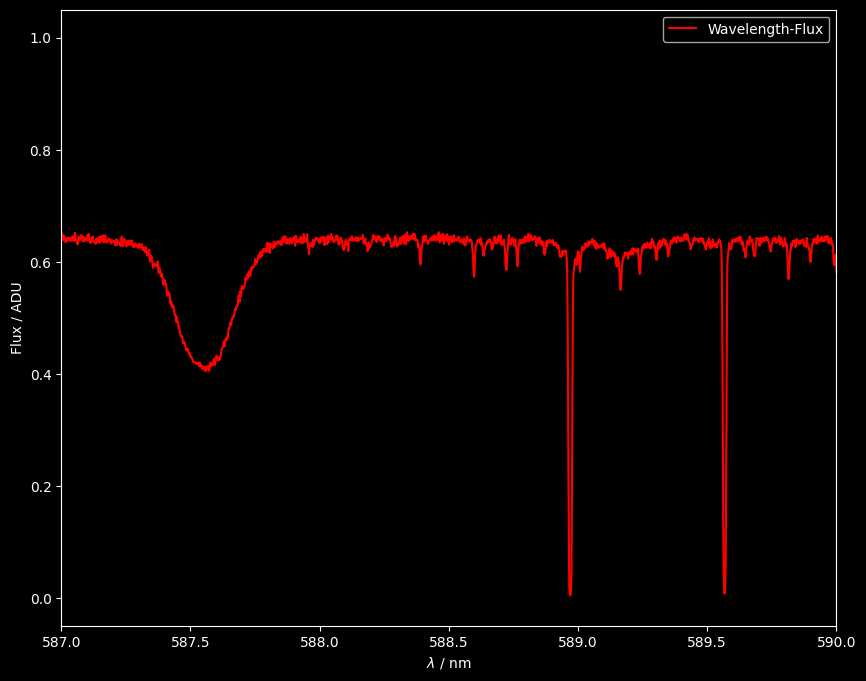

In [32]:
plt.figure(figsize=(10,8))
plt.plot(wavelength,flux,linestyle="-",color="red",label="Wavelength-Flux")
plt.xlabel("$\lambda$ / nm")
plt.ylabel("Flux / ADU")
plt.xlim(587,590)
plt.legend()
plt.show()

In [35]:
wienConstant = 2.8977729e-3  # Wien's displacement constant in meters K

In [36]:
wavelengthM = specData[0][0]*1e-10 # Convert Angstrom to meters
flux = specData[0][4]

In [39]:
peakWavelength = wavelengthM[np.argmax(flux)] # Estimate the peak wavelength (in meters)

In [40]:
estimatedTemperature = wienConstant/peakWavelength

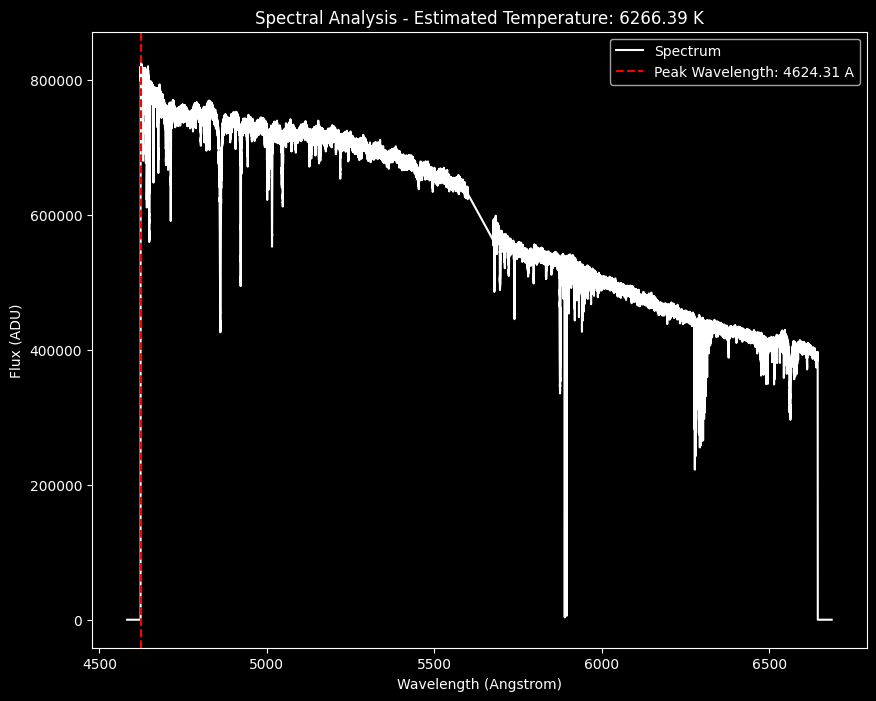

In [42]:
plt.figure(figsize=((10,8)))
plt.plot(wavelengthM*1e10,flux,color="white",label="Spectrum") # Wavelength converted back to Angstroms for plotting
plt.axvline(peakWavelength*1e10,color="r",linestyle="--",label=f"Peak Wavelength: {peakWavelength*1e10:.2f} A")
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux (ADU)")
plt.title(f"Spectral Analysis - Estimated Temperature: {estimatedTemperature:.2f} K")
plt.legend()
plt.show()

## Example
- A star similar to our Sun with a temperature of about 5778 K.
- A radial velocity of 30 km/s away from us, resulting in a redshift.

In [47]:
from scipy.constants import c,h,k

In [48]:
temperature = 5778  # Temperature in Kelvin (approximate temperature of the Sun)
velocity = 30e3  # Radial velocity in m/s (away from the observer)

In [53]:
def PeakWavelength(temperature):
    wienConstant = 2.8977729e-3  # m.K
    return wienConstant / temperature

In [49]:
def PlanckLaw(wavelength:int or float,temperature:int or float)->int or float:
  result = (2.0*h*c**2)/(wavelength**5*(np.exp(h*c/(wavelength*k*temperature))-1))
  return result

In [50]:
wavelengths = np.linspace(100e-9,2000e-9,500) # Wavelengths from 100 nm to 2000 nm

In [51]:
spectrum = PlanckLaw(wavelengths,temperature)

In [52]:
shiftedWavelength = wavelengths * (1+velocity/c)
shiftedSpectrum = PlanckLaw(shiftedWavelength,temperature)

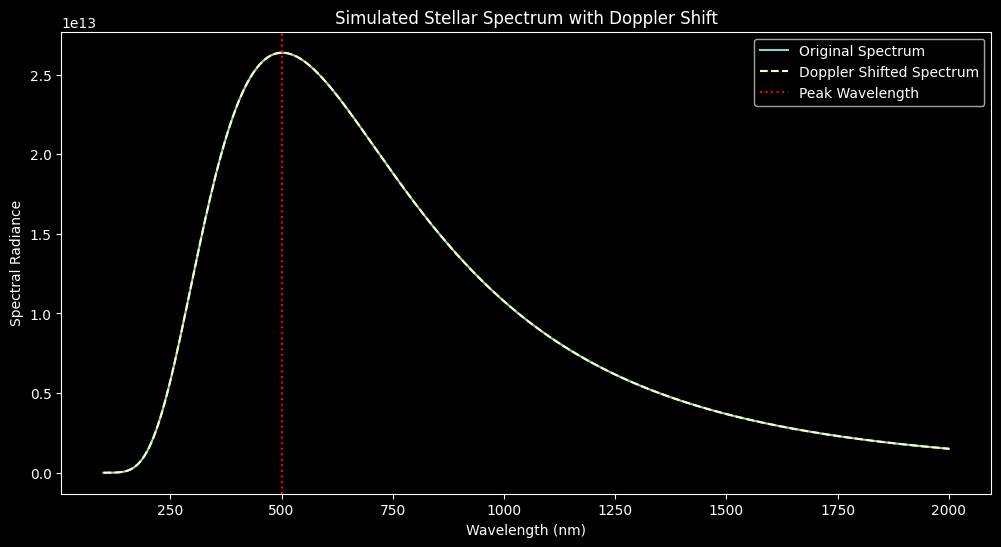

In [54]:
plt.figure(figsize=(12,6))
plt.plot(wavelengths*1e9,spectrum,label='Original Spectrum')
plt.plot(shiftedWavelength*1e9,shiftedSpectrum,linestyle='--',label='Doppler Shifted Spectrum')
plt.axvline(PeakWavelength(temperature)*1e9,color='r',linestyle=':',label='Peak Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Radiance')
plt.title('Simulated Stellar Spectrum with Doppler Shift')
plt.legend()
plt.show()

- This script uses Planck's Law to simulate a blackbody spectrum for a star with a given temperature.
- The peak wavelength is estimated using Wien's Displacement Law.
- The Doppler Shift is simulated by adjusting the wavelengths to simulate a redshift due to the star moving away.
- The original and Doppler-shifted spectra are plotted for comparison.

- **Blackbody Radiation and Stellar Temperature**:

Stars, including our Sun, can often be approximated as blackbodies, objects that absorb all incident electromagnetic radiation and re-emit it.
The simulation uses Planck's Law to model the blackbody radiation, which gives a good approximation of the energy output across different wavelengths for stars.

Wien's Displacement Law helps determine the peak wavelength of this radiation, which is inversely proportional to the temperature of the star. This allows astronomers to estimate the temperature of stars based on their spectrum.

- **Doppler Shift and Stellar Motion**:

The Doppler Shift is a phenomenon observed when there is relative motion between a light source (like a star) and an observer.
In the simulation, applying a Doppler Shift to the spectrum models how the light from a star is redshifted (wavelengths stretched) or blueshifted (wavelengths compressed) due to its motion towards or away from us.
This is crucial in astronomy for measuring the radial velocities of stars and galaxies, which can reveal information about their motion in the universe, such as orbital dynamics, expansion of the universe, and more.

- **Spectral Analysis**:

While the simulation primarily focuses on the continuum spectrum of a star, real spectral analysis also involves studying absorption and emission lines.
These lines are fingerprints of different elements in the star's atmosphere, allowing astronomers to determine its composition.

- **Astrophysical Research and Observations**:

Simulations like this provide a foundation for understanding real observations. When astronomers observe a star, they can compare its spectrum to such models to derive physical properties.
It also helps in calibrating instruments and understanding the limitations and capabilities of observational data.